In [1]:
getwd()
options(repos = 'http://mirrors.ustc.edu.cn/CRAN/') 

[1] "C:/Users/Administrator/Desktop/R/R practice"

In [2]:
install.packages("rgl")

also installing the dependencies 'miniUI', 'manipulateWidget'



package 'miniUI' successfully unpacked and MD5 sums checked
package 'manipulateWidget' successfully unpacked and MD5 sums checked
package 'rgl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpkVTdEC\downloaded_packages


In [3]:
fn.data <- "http://statacumen.com/teach/RSM/data/RSM_TAB_02-08.txt"
df.2.8 <- read.table(fn.data, header=TRUE, skip=1)

In [4]:
str(df.2.8)
df.2.8

'data.frame':	12 obs. of  3 variables:
 $ x1: int  -1 1 -1 1 -9 9 0 0 0 0 ...
 $ x2: int  -1 -1 1 1 0 0 -9 9 0 0 ...
 $ y : int  43 78 69 73 48 76 65 74 76 79 ...


x1,x2,y
-1,-1,43
1,-1,78
-1,1,69
1,1,73
-9,0,48
9,0,76
0,-9,65
0,9,74
0,0,76
0,0,79


In [5]:
df.2.8[,c("x1","x2")] <- replace(df.2.8[,c("x1","x2")], (df.2.8[,c("x1","x2")] == 9), sqrt(2))
df.2.8[,c("x1","x2")] <- replace(df.2.8[,c("x1","x2")], (df.2.8[,c("x1","x2")] == -9), -sqrt(2))
df.2.8

x1,x2,y
-1.000000,-1.000000,43
1.000000,-1.000000,78
-1.000000,1.000000,69
1.000000,1.000000,73
-1.414214,0.000000,48
1.414214,0.000000,76
0.000000,-1.414214,65
0.000000,1.414214,74
0.000000,0.000000,76
0.000000,0.000000,79


In [6]:
library( rgl )
plot3d(df.2.8)

Warning message in warn_if_args_exist(list(...)):
"Extra arguments: "alpha" are being ignored.  If these are meant to be aesthetics, submit them using the 'mapping' variable within ggpairs with ggplot2::aes or ggplot2::aes_string."

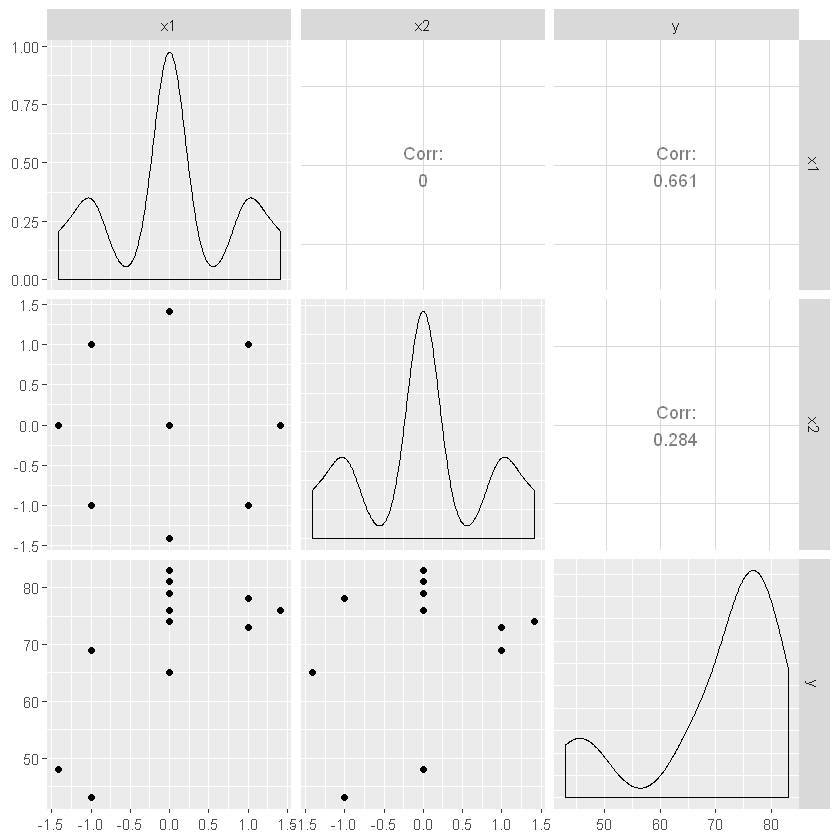

In [12]:
library(ggplot2)
suppressMessages(suppressWarnings(library(GGally)))
p <- ggpairs(df.2.8, alpha = 0.1)
# put scatterplots on top so y axis is vertical
#p <- ggpairs(df.2.8, upper = list(continuous = "points"), lower = list(continuous = "cor"))
print(p)

In [10]:
install.packages('GGally')

also installing the dependencies 'prettyunits', 'progress', 'reshape'



package 'prettyunits' successfully unpacked and MD5 sums checked
package 'progress' successfully unpacked and MD5 sums checked
package 'reshape' successfully unpacked and MD5 sums checked
package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpMj24Cq\downloaded_packages


In [13]:
detach("package:GGally", unload=TRUE)
detach("package:reshape", unload=TRUE)

ERROR: Error in detach("package:reshape", unload = TRUE): invalid 'name' argument


In [14]:
library(Hmisc)
rcorr(as.matrix(df.2.8))

Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units



     x1   x2    y
x1 1.00 0.00 0.66
x2 0.00 1.00 0.28
y  0.66 0.28 1.00

n= 12 


P
   x1     x2     y     
x1        1.0000 0.0193
x2 1.0000        0.3718
y  0.0193 0.3718       

In [5]:
# load the rsm package
library(rsm)

In [6]:
# fit second-order (SO) model
# -- look up ?SO and see other options
rsm.2.8.y.SOx12 <- rsm(y ~ SO(x1, x2), data = df.2.8)

In [7]:
# which variables are available in the rsm object?
names(rsm.2.8.y.SOx12)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        
[13] "data"          "b"             "order"         "B"            
[17] "newlabs"

In [8]:
# which variables are available in the summary of the rsm object?
names(summary(rsm.2.8.y.SOx12))

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"  "canonical"    
[13] "lof"

In [7]:
# show the summary
summary(rsm.2.8.y.SOx12)


Call:
rsm(formula = y ~ SO(x1, x2), data = df.2.8)

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 79.75000    1.21361 65.7133 8.352e-10 ***
x1           9.82475    0.85815 11.4488 2.665e-05 ***
x2           4.21599    0.85815  4.9129 0.0026759 ** 
x1:x2       -7.75000    1.21361 -6.3859 0.0006938 ***
x1^2        -8.87500    0.95944 -9.2502 9.017e-05 ***
x2^2        -5.12500    0.95944 -5.3417 0.0017585 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Multiple R-squared:   0.98,	Adjusted R-squared:  0.9634 
F-statistic: 58.85 on 5 and 6 DF,  p-value: 5.119e-05

Analysis of Variance Table

Response: y
            Df Sum Sq Mean Sq F value    Pr(>F)
FO(x1, x2)   2 914.40  457.20 77.6054 5.155e-05
TWI(x1, x2)  1 240.25  240.25 40.7801 0.0006938
PQ(x1, x2)   2 578.92  289.46 49.1328 0.0001906
Residuals    6  35.35    5.89                  
Lack of fit  3   8.60    2.87  0.3214 0.8119178
Pure error   3  26.75    8.92                  

Stationary p

In [13]:
# 查看方程系数   “$”是提取数据的操作符
rsm.2.8.y.SOx12$coefficients

(Intercept)   FO(x1, x2)x1   FO(x1, x2)x2    TWI(x1, x2) PQ(x1, x2)x1^2 
     79.750000       9.824747       4.215990      -7.750000      -8.875000 
PQ(x1, x2)x2^2 
     -5.125000

In [18]:
b0 <- rsm.2.8.y.SOx12$coefficients[1]

In [19]:
print(b0)

(Intercept) 
      79.75 


In [14]:
b1 <- rsm.2.8.y.SOx12$coefficients[2] + rsm.2.8.y.SOx12$coefficients[6]

In [15]:
b1

FO(x1, x2)x1 
    4.699747

In [32]:
# bootstrapping with 1000 replications 
boot(data=df.2.8,b0, 
  	R=1000)

ERROR: Error in statistic(data, original, ...): could not find function "statistic"


In [27]:
help(boot)

In [36]:
# Bootstrap 95% CI for regression coefficients 
library(boot)
# function to obtain regression weights 
bs <- function(formula, data, indices) {
   d <- data[indices,]  # allows boot to select sample 
   fit <- lm(formula, data=d)
   return(coef(fit)) 
} 
# bootstrapping with 1000 replications 
results <- boot(data=df.2.8, statistic=bs, 
  	R=1000, formula = y ~ SO(x1, x2))

In [39]:
# Bootstrap 95% CI for regression coefficients 
library(boot)
# function to obtain regression weights 
bs <- function(formula, data, indices) {
   d <- data[indices,]  # allows boot to select sample 
   fit <- rsm(formula, data=d)
   return(coef(fit)) 
} 
# bootstrapping with 1000 replications 
results <- boot(data=df.2.8, statistic=bs, 
  	R=1000, formula = y ~ SO(x1, x2))

Warning message in rsm(formula, data = d):
"Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object."Warning message in rsm(formula, data = d):
"Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object."Warning message in rsm(formula, data = d):
"Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object."Warning message in rsm(formula, data = d):
"Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object."Warning message in rsm(formula, data = d):
"Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object."Warning message in rsm(formula, data = d):
"Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object."Warning message in rsm(formula, data = d):
"Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object."Warning message in rsm(formula, data = d):
"Some coefficients are aliased - cannot use 'rs

  Returning an 'lm' object."Warning message in rsm(formula, data = d):
"Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object."Warning message in rsm(formula, data = d):
"Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object."Warning message in rsm(formula, data = d):
"Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object."Warning message in rsm(formula, data = d):
"Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object."Warning message in rsm(formula, data = d):
"Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object."Warning message in rsm(formula, data = d):
"Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object."Warning message in rsm(formula, data = d):
"Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object."Warning message in rsm(formula, data = d):
"Some coefficients 

  Returning an 'lm' object."Warning message in rsm(formula, data = d):
"Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object."Warning message in rsm(formula, data = d):
"Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object."Warning message in rsm(formula, data = d):
"Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object."Warning message in rsm(formula, data = d):
"Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object."Warning message in rsm(formula, data = d):
"Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object."Warning message in rsm(formula, data = d):
"Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object."Warning message in rsm(formula, data = d):
"Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object."Warning message in rsm(formula, data = d):
"Some coefficients 


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df.2.8, statistic = bs, R = 1000, formula = y ~ SO(x1, 
    x2))


Bootstrap Statistics :
     original      bias    std. error
t1* 79.750000 -0.13927495    1.716981
t2*  9.824747 -0.08640792    5.522761
t3*  4.215990 -0.27957443    4.075035
t4* -7.750000 -0.12358105    6.186726
t5* -8.875000  0.03835445    3.495688
t6* -5.125000  0.04172832    1.224691

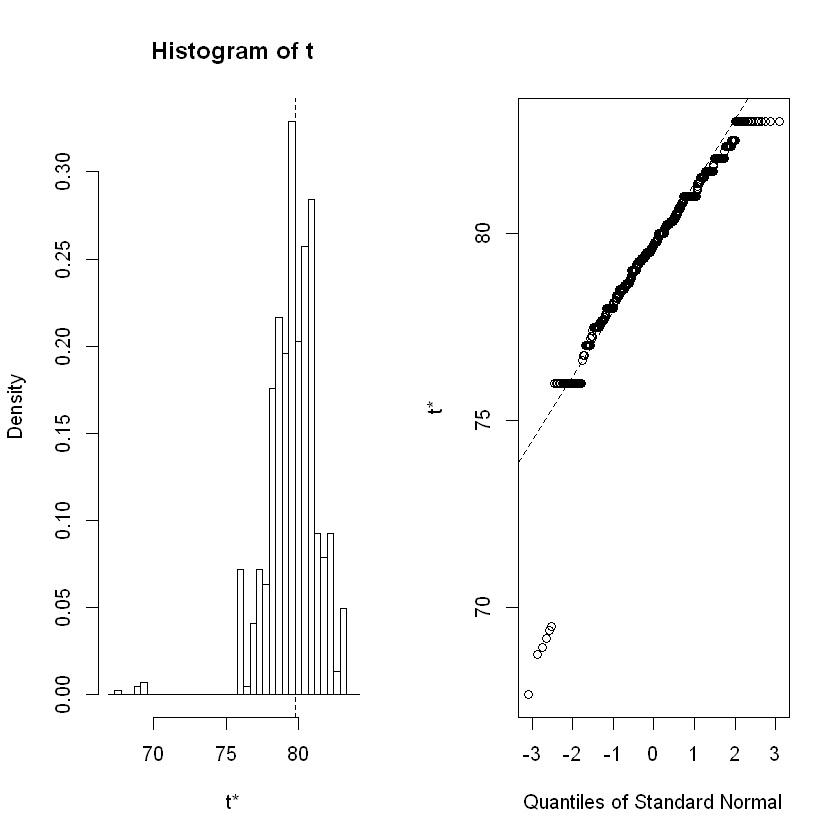

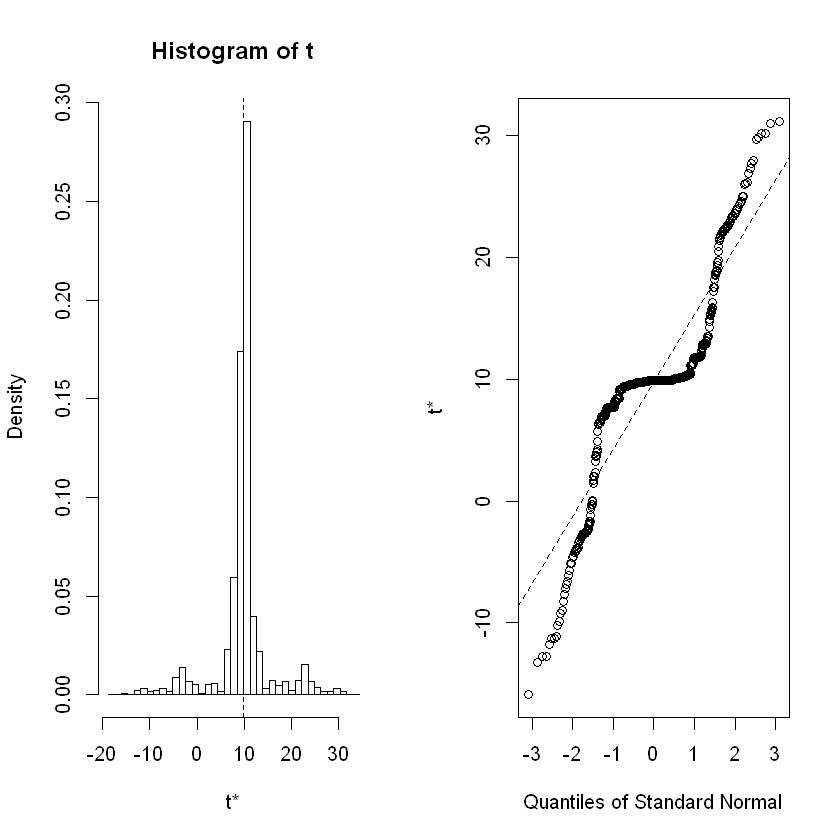

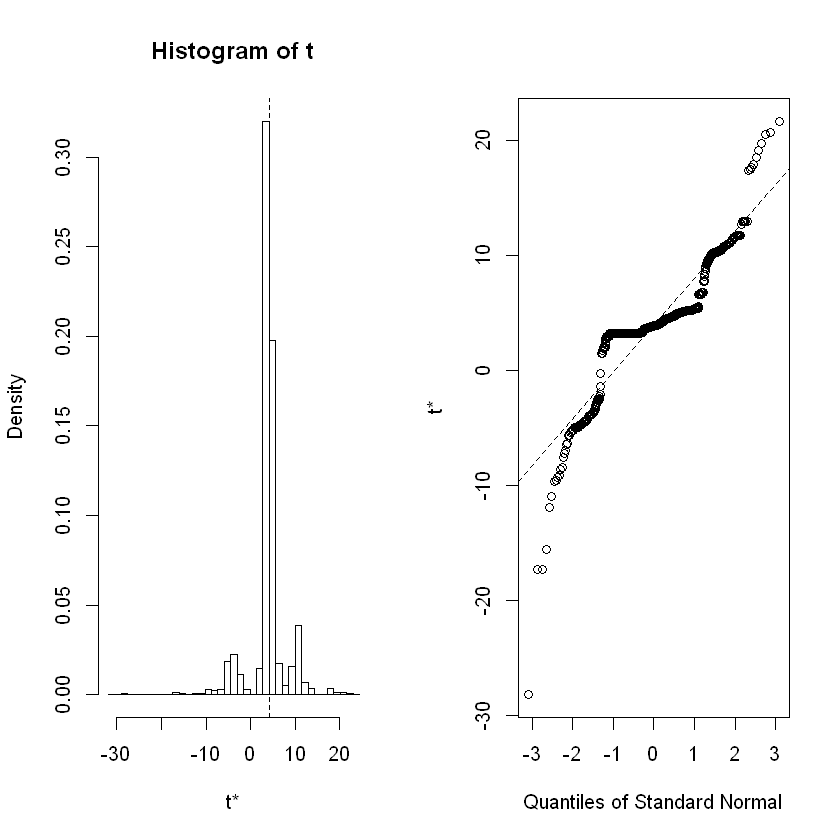

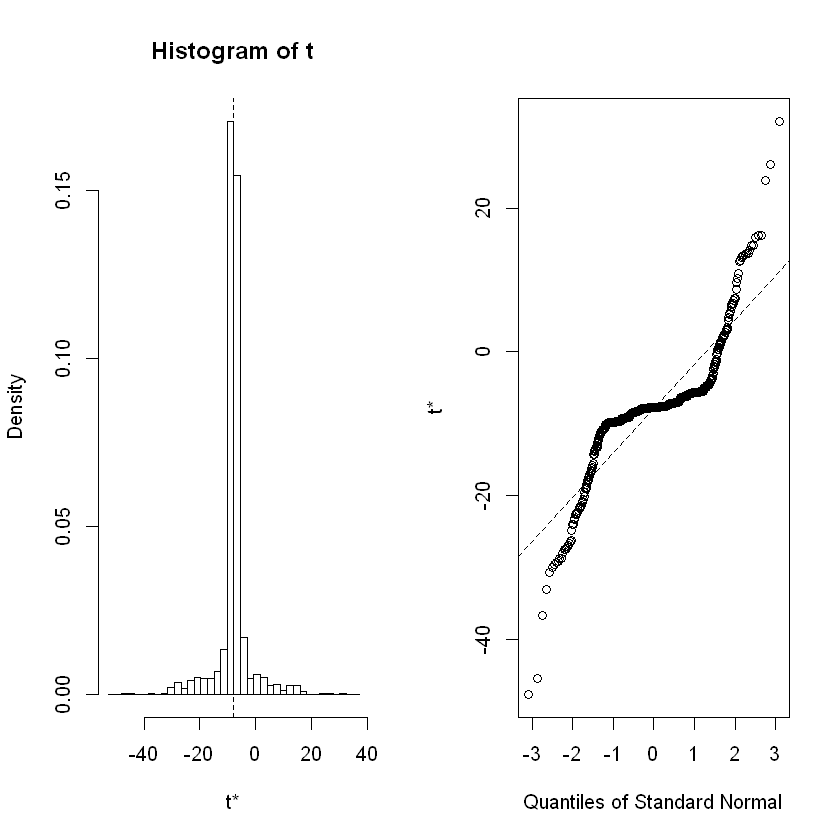

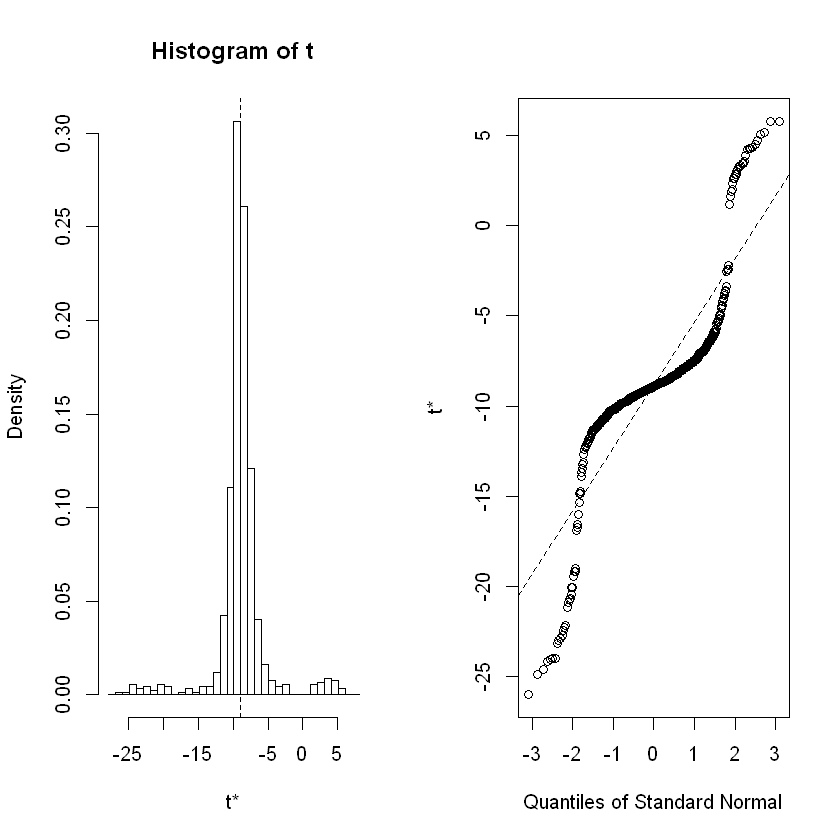

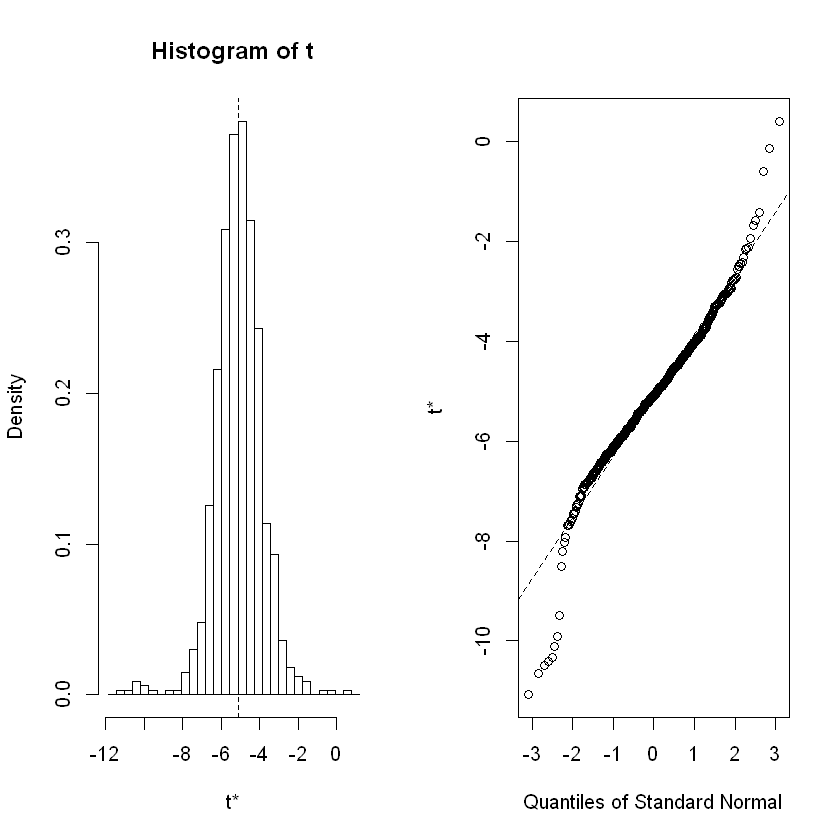

In [34]:
# view results
results
plot(results, index=1) # intercept 
plot(results, index=2) # x1
plot(results, index=3) # x2
plot(results, index=4) # x1:x2
plot(results, index=5) # x1^2 
plot(results, index=6) # x2^2 

In [40]:
# get 95% confidence intervals 
boot.ci(results, type="perc", index=1) # intercept 
boot.ci(results, type="perc", index=2) # x1
boot.ci(results, type="bca", index=3) # x2
boot.ci(results, type="bca", index=4) # x1:x2
boot.ci(results, type="bca", index=5) # x1^2 
boot.ci(results, type="bca", index=6) # x2^2 

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = results, type = "perc", index = 1)

Intervals : 
Level     Percentile     
95%   (76, 83 )  
Calculations and Intervals on Original Scale

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = results, type = "perc", index = 2)

Intervals : 
Level     Percentile     
95%   (-3.265, 23.192 )  
Calculations and Intervals on Original Scale

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 999 bootstrap replicates

CALL : 
boot.ci(boot.out = results, type = "bca", index = 3)

Intervals : 
Level       BCa          
95%   (-4.418, 11.216 )  
Calculations and Intervals on Original Scale

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 966 bootstrap replicates

CALL : 
boot.ci(boot.out = results, type = "bca", index = 4)

Intervals : 
Level       BCa          
95%   (-14.976,  11.771 )  
Calculations and Intervals on Original Scale
Some BCa intervals may be unstable

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 922 bootstrap replicates

CALL : 
boot.ci(boot.out = results, type = "bca", index = 5)

Intervals : 
Level       BCa          
95%   (-15.428,   2.832 )  
Calculations and Intervals on Original Scale

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 811 bootstrap replicates

CALL : 
boot.ci(boot.out = results, type = "bca", index = 6)

Intervals : 
Level       BCa          
95%   (-6.942, -2.159 )  
Calculations and Intervals on Original Scale

In [19]:
help(boot.ci)

In [20]:
# fit the first-order model
rsm.2.8.y.FOx12 <- rsm(y ~ FO(x1, x2), data = df.2.8)

In [21]:
rsm.2.8.y.FOx12$studres <- rstudent(rsm.2.8.y.FOx12)
summary(rsm.2.8.y.FOx12)


Call:
rsm(formula = y ~ FO(x1, x2), data = df.2.8)

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  70.4167     2.8129 25.0338 1.244e-09 ***
x1            9.8247     3.4450  2.8519   0.01903 *  
x2            4.2160     3.4450  1.2238   0.25210    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Multiple R-squared:  0.5169,	Adjusted R-squared:  0.4096 
F-statistic: 4.815 on 2 and 9 DF,  p-value: 0.03785

Analysis of Variance Table

Response: y
            Df Sum Sq Mean Sq F value  Pr(>F)
FO(x1, x2)   2 914.40  457.20  4.8154 0.03785
Residuals    9 854.51   94.95                
Lack of fit  6 827.76  137.96 15.4722 0.02333
Pure error   3  26.75    8.92                

Direction of steepest ascent (at radius 1):
       x1        x2 
0.9189626 0.3943447 

Corresponding increment in original units:
       x1        x2 
0.9189626 0.3943447 


In [22]:
# plot diagnistics
par(mfrow=c(2,4))

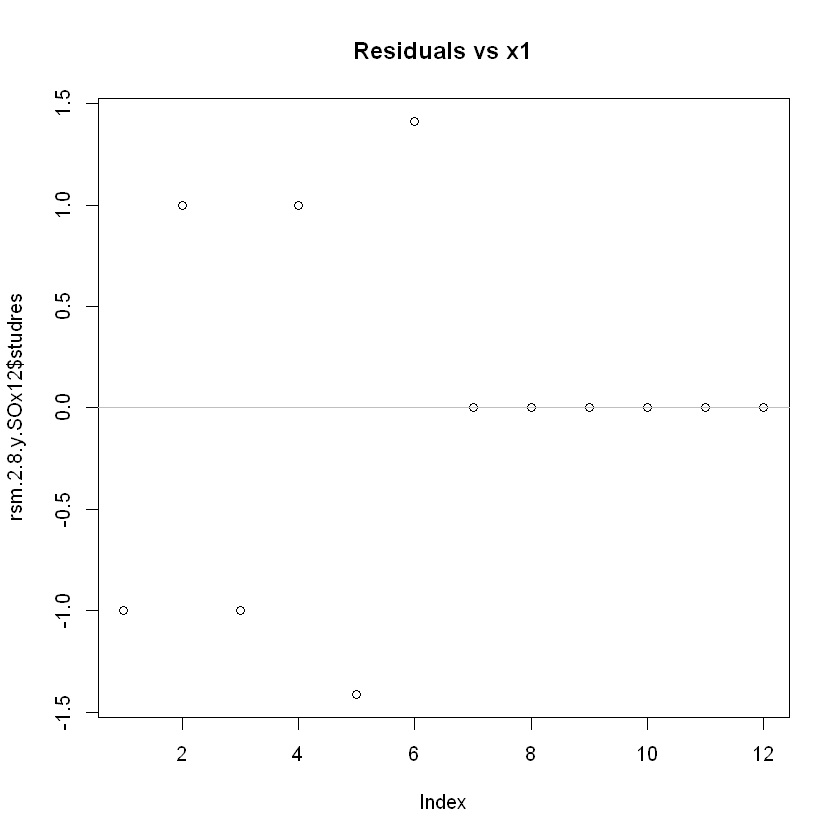

In [23]:
plot(df.2.8$x1, rsm.2.8.y.SOx12$studres, main="Residuals vs x1")
# horizontal line at zero
abline(h = 0, col = "gray75")

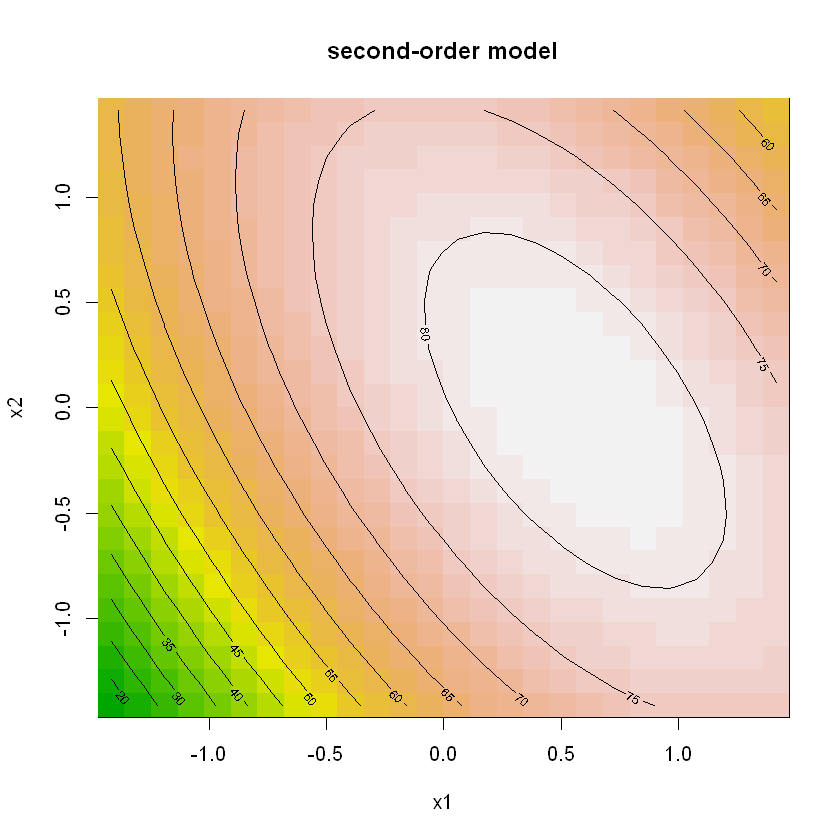

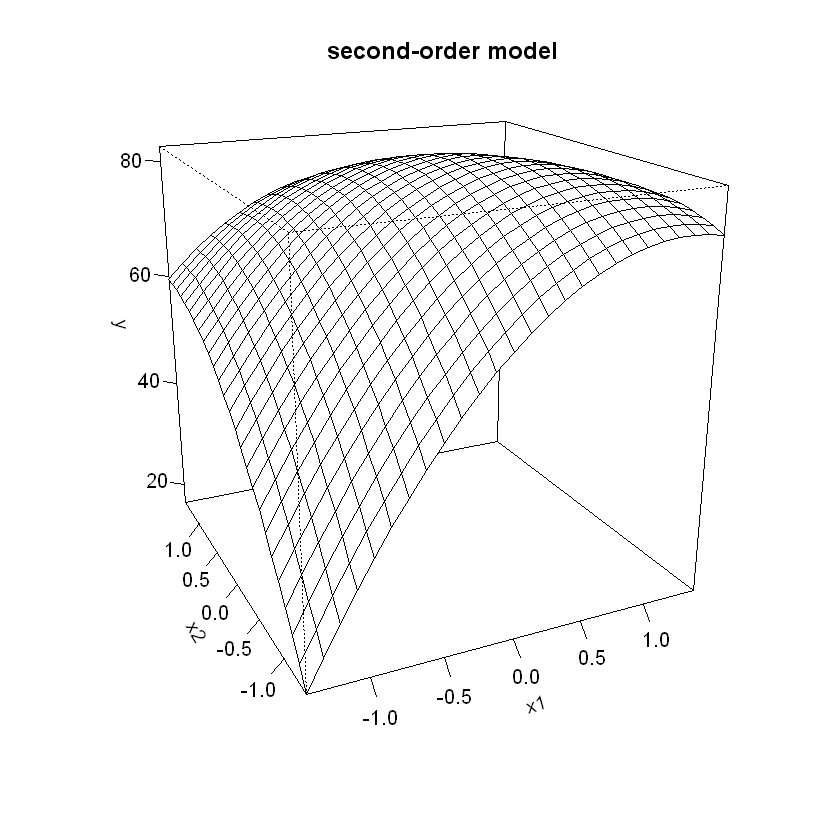

In [24]:
# second-order model
contour(rsm.2.8.y.SOx12, ~ x1 + x2, image = TRUE, main="second-order model")
persp(rsm.2.8.y.SOx12, x2 ~ x1, zlab = "y", main="second-order model")